In [42]:
import pandas as pd
from glob import glob
import seaborn as sns 
import networkx as nx
import matplotlib.pyplot as plt
import os

Undirected Graph

In [25]:
#initialising an undirected graph 
G_ud=nx.DiGraph()

G_ud.add_nodes_from(["A","B","C","D","E"])
G_ud.add_edges_from([("A","B"), ("A", "E"), ("A", "D"), ("E", "C"),("C", "B")])

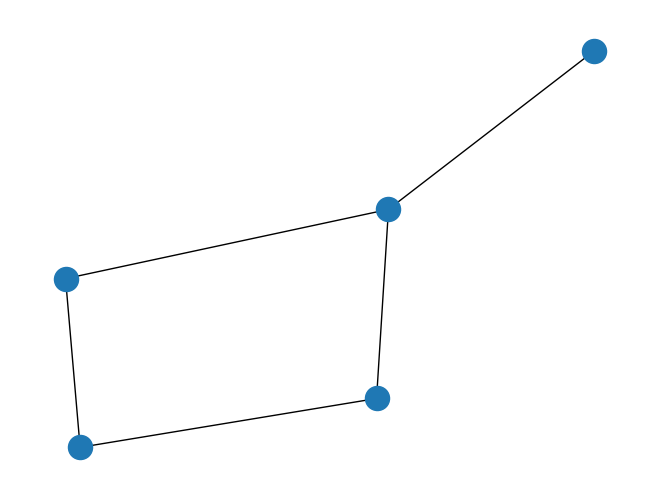

In [5]:
nx.draw(G_ud)

In [6]:
print(G_ud.adj)
print(G_ud.nodes)
print(G_ud.edges)

{'A': {'B': {}, 'E': {}, 'D': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'E': {}, 'B': {}}, 'D': {'A': {}}, 'E': {'A': {}, 'C': {}}}
['A', 'B', 'C', 'D', 'E']
[('A', 'B'), ('A', 'E'), ('A', 'D'), ('B', 'C'), ('C', 'E')]


In [15]:
#initialising a graph with attributes 

G_ud.graph["Name"]="Undirected"
G_ud.edges[("A","E")]["E_M"]="Epi_Marker"

print(G_ud.nodes(data=True))

[('A', {'E_M': 'Epi_Marker'}), ('B', {}), ('C', {}), ('D', {}), ('E', {})]


In [18]:
#sending graph to a dataframe 

df=nx.to_pandas_edgelist(G_ud,)

print(df)

  source target         E_M
0      A      B         NaN
1      A      E  Epi_Marker
2      A      D         NaN
3      B      C         NaN
4      C      E         NaN


In [33]:
nets_dir="/Users/jaeeponde/Documents/iisc training/net/"

In [43]:
type(glob)

str

In [29]:
print(net_li)

/Users/jaeeponde/Documents/iisc training/netNet*.*


In [50]:
path="/Users/jaeeponde/Documents/iisc training/net/Net_string_interactions_p53.tsv"
G_df=pd.read_csv(path, sep='\s')

G_df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/29/458ydd_j11q4vpw8md8c37fh0000gn/T/ipykernel_30964/2380254187.py:2: SyntaxWarning: invalid escape sequence '\s'
  G_df=pd.read_csv(path, sep='\s')
/var/folders/29/458ydd_j11q4vpw8md8c37fh0000gn/T/ipykernel_30964/2380254187.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  G_df=pd.read_csv(path, sep='\s')


,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,ATM,SIRT1,9606.ENSP00000278616,9606.ENSP00000212015,0,0.0,0.0,0.0,0.049,0.000,0.00,0.855,0.856
1,ATM,RPA1,9606.ENSP00000278616,9606.ENSP00000254719,0,0.0,0.0,0.0,0.047,0.660,0.50,0.611,0.928
2,ATM,MDM2,9606.ENSP00000278616,9606.ENSP00000258149,0,0.0,0.0,0.0,0.092,0.621,0.75,0.955,0.995
3,ATM,CREBBP,9606.ENSP00000278616,9606.ENSP00000262367,0,0.0,0.0,0.0,0.060,0.000,0.00,0.487,0.497
4,ATM,EP300,9606.ENSP00000278616,9606.ENSP00000263253,0,0.0,0.0,0.0,0.074,0.000,0.00,0.900,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TP53,HSP90AA1,9606.ENSP00000269305,9606.ENSP00000335153,0,0.0,0.0,0.0,0.000,0.903,0.00,0.995,0.999
66,TP53,ATM,9606.ENSP00000269305,9606.ENSP00000278616,0,0.0,0.0,0.0,0.103,0.928,0.90,0.975,0.999
67,TP53,TP53BP2,9606.ENSP00000269305,9606.ENSP00000341957,0,0.0,0.0,0.0,0.000,0.988,0.50,0.996,0.999
68,TP53BP2,EP300,9606.ENSP00000341957,9606.ENSP00000263253,0,0.0,0.0,0.0,0.060,0.292,0.00,0.189,0.413


In [51]:
G_df.replace(to_replace={"Act":1, "Inh":-1}, inplace=True)
G_df

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,ATM,SIRT1,9606.ENSP00000278616,9606.ENSP00000212015,0,0.0,0.0,0.0,0.049,0.000,0.00,0.855,0.856
1,ATM,RPA1,9606.ENSP00000278616,9606.ENSP00000254719,0,0.0,0.0,0.0,0.047,0.660,0.50,0.611,0.928
2,ATM,MDM2,9606.ENSP00000278616,9606.ENSP00000258149,0,0.0,0.0,0.0,0.092,0.621,0.75,0.955,0.995
3,ATM,CREBBP,9606.ENSP00000278616,9606.ENSP00000262367,0,0.0,0.0,0.0,0.060,0.000,0.00,0.487,0.497
4,ATM,EP300,9606.ENSP00000278616,9606.ENSP00000263253,0,0.0,0.0,0.0,0.074,0.000,0.00,0.900,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TP53,HSP90AA1,9606.ENSP00000269305,9606.ENSP00000335153,0,0.0,0.0,0.0,0.000,0.903,0.00,0.995,0.999
66,TP53,ATM,9606.ENSP00000269305,9606.ENSP00000278616,0,0.0,0.0,0.0,0.103,0.928,0.90,0.975,0.999
67,TP53,TP53BP2,9606.ENSP00000269305,9606.ENSP00000341957,0,0.0,0.0,0.0,0.000,0.988,0.50,0.996,0.999
68,TP53BP2,EP300,9606.ENSP00000341957,9606.ENSP00000263253,0,0.0,0.0,0.0,0.060,0.292,0.00,0.189,0.413


In [61]:
path="/Users/jaeeponde/Documents/iisc training/net/Net_BT474_Breast_Cell_Line_Short-term_ErbB_Network_24970389.topo"
G_df=pd.read_csv(path, sep=" ")
G_df

,Source,Target,Type
0,mTOR,mTOR,Act
1,AKT,mTOR,Act
2,pertuzumab,mTOR,Act
3,ERBB3,PLCg,Act
4,PLCg,PLCg,Act
5,EGF,PLCg,Act
6,ERBB1,PLCg,Act
7,ERBB2,PLCg,Act
8,PLCg,ERBB1,Act
9,pertuzumab,ERBB1,Inh


In [62]:
G_df.columns

Index(['Source', 'Target', 'Type'], dtype='object')

In [63]:
G_df['Type'] = G_df['Type'].map({'Act': 1, 'Inh': -1})
G_df

,Source,Target,Type
0,mTOR,mTOR,1
1,AKT,mTOR,1
2,pertuzumab,mTOR,1
3,ERBB3,PLCg,1
4,PLCg,PLCg,1
5,EGF,PLCg,1
6,ERBB1,PLCg,1
7,ERBB2,PLCg,1
8,PLCg,ERBB1,1
9,pertuzumab,ERBB1,-1


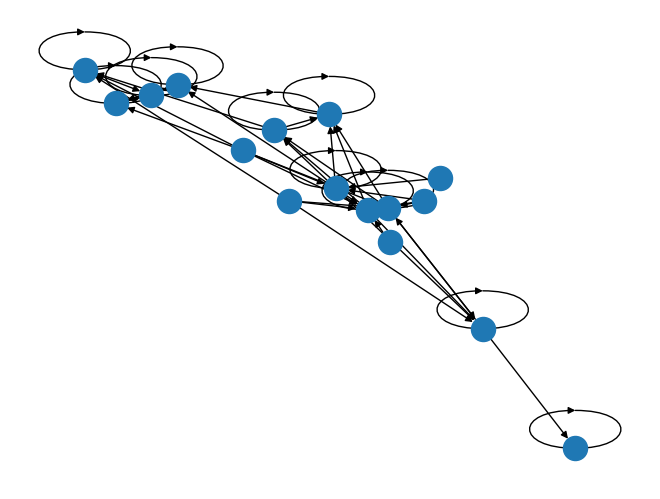

In [67]:
G=nx.from_pandas_edgelist(G_df, source='Source', target='Target', edge_attr='Type', create_using=nx.DiGraph)
nx.draw(G)

In [ ]:
indeg=G_.sum(axis=0)